## Visualisation Presentation
For this presentation I will be using a kaggle datset (https://www.kaggle.com/code/fulviocapra/sc2-iem-katowice-data-analytics/notebook)

This is analylitical data about Sc2 pro games during the Intel Extreme Master (IEM) esports tournament held in Katowice, Poland.
I will clean, display and draw insights from the data using the python packages show below.

In [298]:
# Importing the packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [299]:
# Now i will import the csv dataset from locally
iem = pd.read_csv("IEM_games.csv")
iem.head()

,Unnamed: 0,Year,Date,Time,Player1,Player2,MapName,Length,Race1,Race2,...,APM2,AvgSPM,SPM1,SPM2,AvgSQ,SQ1,SQ2,AvgPSC,PSC1,PSC2
0,1,2016,03-05,17:17:08,Polt,Snute,RuinsOfSeras,23:26,T,Z,...,248,17.163381,14.196245,20.137111,77,69,86,3.337298,5.128205,1.546392
1,2,2016,03-05,16:52:16,Polt,Snute,Ulrena,12:23,T,Z,...,263,18.672701,14.107624,23.208086,87,86,87,8.285741,6.862745,9.708738
2,3,2016,03-05,16:32:38,Polt,Snute,CentralProtocol,13:07,T,Z,...,308,14.074966,13.373235,14.778725,92,91,93,11.009174,7.339450,14.678899
3,4,2016,03-05,16:12:22,Polt,Snute,PrionTerraces,07:19,T,Z,...,240,19.217802,14.791656,23.669906,103,110,96,9.016393,8.196721,9.836066
4,5,2016,03-05,16:02:56,Polt,Snute,OrbitalShipyard,17:03,T,Z,...,268,18.318570,16.786930,19.855524,96,99,92,7.783938,4.929577,10.638298


## Understanding the Data
Though most of the columns are have obvious meaning, Their are some player statistics that will need to be explained to those unfamilar is RTS terminology.

- **APM** - actions per minute - This refers to the amount of keyboard and mouse clicks that occur within a minute. This is used as a way of measuring a players speed and therefore skill. Not always accurate as alot of spamming* occurs.


- **SPM** - screens per minute - Refers to how many screens are processed a minute. Similar to apm it is a measure of speed and is not always 
accurate due to spamming*


- **SQ** - spending quotient - $ \text{SQ} = 35 \cdot \log(\sqrt{\text{Income} \cdot \text{Spending Rate}}) - 0.00137 \cdot (\text{Unspent}) + 240 $ This is a Star Craft specific statistic and measures how well you are macroing*. The higher the number, the better the player is doing. 

- **PSC** - percentage supply capped - Shows the time the player was supply capped* during the game as a percentage of total game length. The lower the number the better but is not always accuracte for longer games where players are at max supply

## Cleaning the data

In [300]:
# The data itself is already in good shape, index column can be removed
iem.drop(columns = "Unnamed: 0", inplace = True)
iem.head()

,Year,Date,Time,Player1,Player2,MapName,Length,Race1,Race2,Matchup,...,APM2,AvgSPM,SPM1,SPM2,AvgSQ,SQ1,SQ2,AvgPSC,PSC1,PSC2
0,2016,03-05,17:17:08,Polt,Snute,RuinsOfSeras,23:26,T,Z,TvZ,...,248,17.163381,14.196245,20.137111,77,69,86,3.337298,5.128205,1.546392
1,2016,03-05,16:52:16,Polt,Snute,Ulrena,12:23,T,Z,TvZ,...,263,18.672701,14.107624,23.208086,87,86,87,8.285741,6.862745,9.708738
2,2016,03-05,16:32:38,Polt,Snute,CentralProtocol,13:07,T,Z,TvZ,...,308,14.074966,13.373235,14.778725,92,91,93,11.009174,7.339450,14.678899
3,2016,03-05,16:12:22,Polt,Snute,PrionTerraces,07:19,T,Z,TvZ,...,240,19.217802,14.791656,23.669906,103,110,96,9.016393,8.196721,9.836066
4,2016,03-05,16:02:56,Polt,Snute,OrbitalShipyard,17:03,T,Z,TvZ,...,268,18.318570,16.786930,19.855524,96,99,92,7.783938,4.929577,10.638298


In [301]:
# I can also optionally split data into years to make certain process easier.
iemyear = {year: group for year, group in iem.groupby("Year")}
iemyear[2019].head()

,Year,Date,Time,Player1,Player2,MapName,Length,Race1,Race2,Matchup,...,APM2,AvgSPM,SPM1,SPM2,AvgSQ,SQ1,SQ2,AvgPSC,PSC1,PSC2
918,2019,03-03,14:54:00,soO,Stats,YearZeroLE,07:45,Z,P,ZvP,...,226,35.228658,38.371884,32.045011,117,127,107,8.533654,7.692308,9.375000
919,2019,03-03,14:44:57,soO,Stats,PortAleksanderLE,12:15,Z,P,ZvP,...,209,40.730579,45.778627,35.671710,125,127,122,12.745098,13.725490,11.764706
920,2019,03-03,14:31:42,soO,Stats,King'sCoveLE,09:41,Z,P,ZvP,...,203,47.161839,52.263138,42.049113,129,141,117,9.876543,8.641975,11.111111
921,2019,03-03,14:16:30,soO,Stats,KairosJunctionLE,09:50,Z,P,ZvP,...,202,37.057723,38.584905,35.525171,130,138,121,5.487805,3.658537,7.317073
922,2019,03-03,14:05:40,soO,Stats,CyberForestLE,09:57,Z,P,ZvP,...,207,37.717354,43.617584,31.825371,133,143,124,6.626506,3.614458,9.638554


The result columns could be combined into one column but that would make indivual player stats harder to find so i will leave it.

## Analysis 

To start I will be analysing the apm statistic. It is a staple measure of skill in the rts genre of games and will be a good starting point.

Text(0.5, 1.0, 'Average APM over Time')

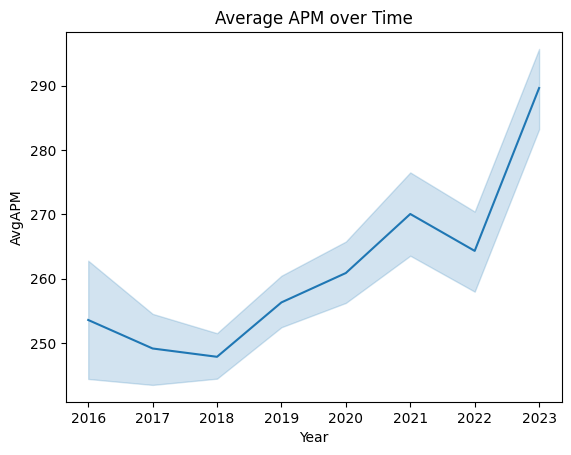

In [302]:
# Lets first look at overall apm across the entrie 7 years of IEM
sns.lineplot(x = "Year", y = "AvgAPM", data=iem )

plt.title("Average APM over Time")

As you can see their has been a very steady increase in APM over the first 6 years with a huge jump in 2022 - 2023.

<Axes: xlabel='Year', ylabel='AvgSPM'>

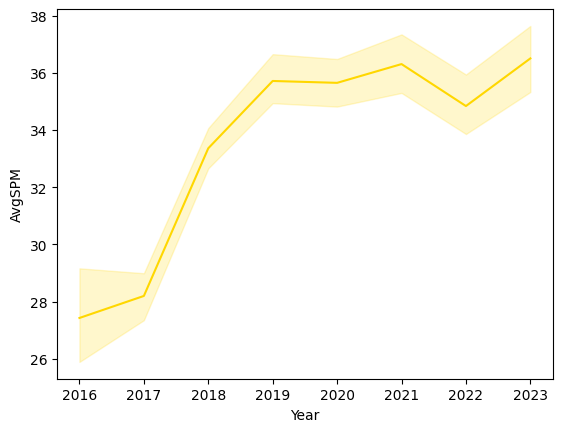

In [303]:
# Lets compare this to SPM.
sns.lineplot(x="Year" , y = "AvgSPM", color = "gold", data=iem)

This again shows a huge increase that plateaus at around 36 spm. This dramatic increase in 2017 - 2018 coinsides with the increase of apm, safely impling that the skill of players has increased over time.

### Race split

The 3 races in the game (Zerg, Terran and Protoss) all have different basic mechanics to each other. For example, The playstyle promotes lots of cheap, weaker unit that overwhelm the enemy compared to the Protoss' few , expensive heavy-hitting units.


This should i want to see how this is represented through APM.

In [304]:
# Lets split the data into the 3 different races.
# This will be more difficult than expected as both player 1 and 2 can be either race.
# I think the best way to do this will be using the race column and a 'or' statment

zergmatches = iem[(iem["Race1"] == "Z") | (iem["Race2"] == "Z")]

# Now I want to get the apm of the zerg player in the match.

zerg1 = zergmatches.loc[zergmatches["Race1"] == "Z", ["Year" ,"APM1"]].rename(columns = {"APM1":"APM"})
zerg2 = zergmatches.loc[zergmatches["Race2"] == "Z", ["Year" ,"APM2"]].rename(columns = {"APM2":"APM"})

# Now i will combine the 2 datframes to get a complete list.

zerg_apm_year = pd.concat([zerg1, zerg2], ignore_index=True)
zerg_apm_year

,Year,APM
0,2016,361
1,2016,371
2,2016,321
3,2016,255
4,2016,245
...,...,...
1780,2023,331
1781,2023,243
1782,2023,257
1783,2023,338


In [305]:
# Repeat this with all the other races
#Protoss
tossmatches = iem[(iem["Race1"] == "P") | (iem["Race2"] == "P")]

toss1 = tossmatches.loc[tossmatches["Race1"] == "P", ["Year" ,"APM1"]].rename(columns = {"APM1":"APM"})
toss2 = tossmatches.loc[tossmatches["Race2"] == "P", ["Year" ,"APM2"]].rename(columns = {"APM2":"APM"})

toss_apm_year = pd.concat([toss1, toss2], ignore_index=True)
toss_apm_year

,Year,APM
0,2016,190
1,2016,176
2,2016,183
3,2016,186
4,2016,197
...,...,...
1808,2023,208
1809,2023,240
1810,2023,221
1811,2023,223


In [306]:
#Terran
terrmatches = iem[(iem["Race1"] == "T") | (iem["Race2"] == "T")]

terr1 = terrmatches.loc[terrmatches["Race1"] == "T", ["Year" ,"APM1"]].rename(columns = {"APM1":"APM"})
terr2 = terrmatches.loc[terrmatches["Race2"] == "T", ["Year" ,"APM2"]].rename(columns = {"APM2":"APM"})

terr_apm_year = pd.concat([terr1, terr2], ignore_index=True)
terr_apm_year

,Year,APM
0,2016,216
1,2016,242
2,2016,209
3,2016,251
4,2016,211
...,...,...
1557,2023,239
1558,2023,279
1559,2023,286
1560,2023,256


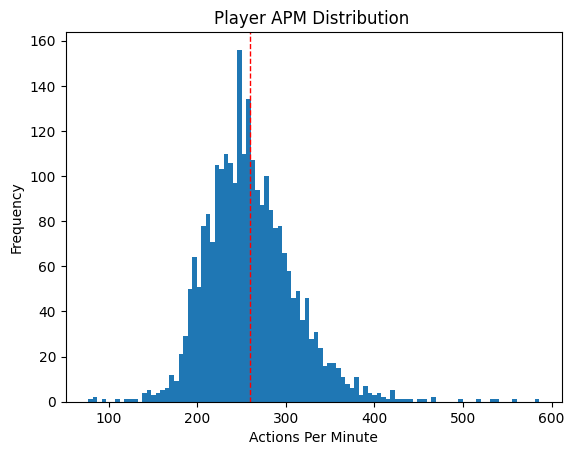

In [307]:
# Before we do the multi line plot, Lets compare overall apm distribution.
# Over all APM

plt.hist(iem["AvgAPM"], bins = 100)
plt.xlabel("Actions Per Minute")
plt.ylabel("Frequency")
plt.title("Player APM Distribution ")
# Lets also plot the mean on it so its easier to infer the distribution
apm_mean = np.mean(iem["AvgAPM"])
plt.axvline(apm_mean, color='red', linestyle='dashed', linewidth=1)

plt.show()

This shows a normal distribution with a mean of around 260 apm.

Text(0.5, 1.0, 'Player APM Distribution by Race')

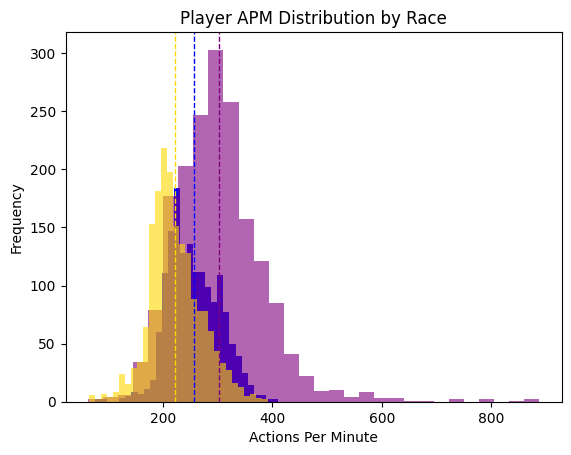

In [308]:
# Lets do a hist but seperate into races

plt.hist(terr_apm_year["APM"], bins=30, alpha=1, color='blue', label='Terran')
terr_apm_mean = np.mean(terr_apm_year["APM"])
plt.axvline(terr_apm_mean, color='blue', linestyle='dashed', linewidth=1)

plt.hist(zerg_apm_year["APM"], bins=30, alpha=0.6, color='purple', label='Zerg')
zerg_apm_mean = np.mean(zerg_apm_year["APM"])
plt.axvline(zerg_apm_mean, color='purple', linestyle='dashed', linewidth=1)

plt.hist(toss_apm_year["APM"], bins=30, alpha=0.6, color='gold', label='Protoss')
toss_apm_mean = np.mean(toss_apm_year["APM"])
plt.axvline(toss_apm_mean, color='gold', linestyle='dashed', linewidth=1)


plt.xlabel("Actions Per Minute")
plt.ylabel("Frequency")
plt.title("Player APM Distribution by Race")

This not only highlights the disparity between race apms but also the amount of players in each race. Zerg having the most players then Protoss and Terran.

<Axes: xlabel='Year', ylabel='APM'>

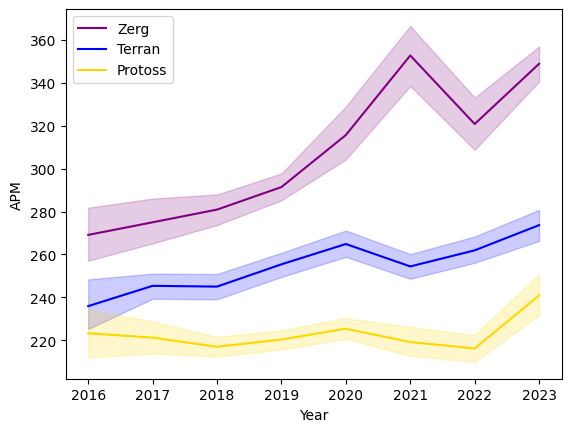

In [309]:
# Now let make multi-line plot
sns.lineplot(x = "Year", y = "APM", color = "purple", label ="Zerg", data = zerg_apm_year) 
sns.lineplot(x = "Year", y = "APM", color = "blue" , label ="Terran", data = terr_apm_year)
sns.lineplot(x = "Year", y = "APM", color = "gold" , label ="Protoss", data = toss_apm_year)



- This graph really higlights how zergs have become significantly faster over the 7 years. This is due to the nature of zerg mechanics and how they promote hit and run tactics which generally require higher apm.
- Terran has seen a increase, but a slight one.
- Protoss has remained relativly constant.

If we take APM as a flat measure of skill, This graph suggests that Zergs are leaps and bounds better than the other two races. This is most certainly not the case.


### Match Result Data


To start lets test whether our supposed 'winner' race truley wins most of the games.

In [310]:
# This will be slightly tricky for similar reasons to spliting apm by race
# as either player one or two can win the game

# To tackle this I will do a simillar thing and concat two lists
p1vic = iem[iem["Res1"] == "V"]["Race1"]
p2vic = iem[iem["Res2"] == "V"]["Race2"]

race_victorys = pd.concat([p1vic, p2vic], ignore_index=True)

C:\Users\londe\AppData\Local\Temp\ipykernel_18492\3394442629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = race_victorys,palette={"Z": "purple", "T": "blue", "P": "gold"})


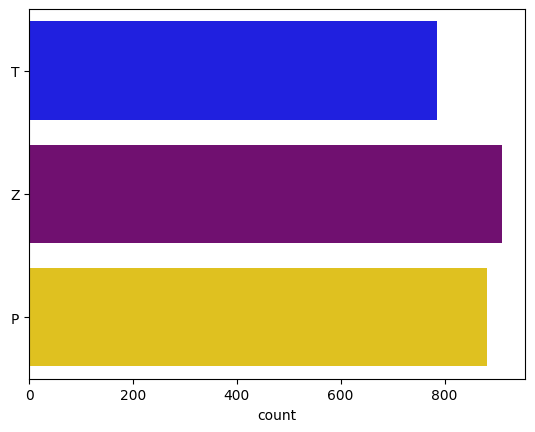

In [311]:
# Now lets plot this to see.
sns.countplot(data = race_victorys,palette={"Z": "purple", "T": "blue", "P": "gold"})
plt.show()

In reality the races are quite evenly matched, With Zerg overall holding the most wins with Protoss and Terran close behind.
This data is also not entirely accurate as due to their being more Zerg players, They will have more wins in general.

In [312]:
# Lets calculate the total amount of each player race
player_race = iem[["Player1", "Race1"]].drop_duplicates()

len(player_race[player_race["Race1"] == "Z"]) #65 Zergs

len(player_race[player_race["Race1"] == "T"]) #50 Terrans

len(player_race[player_race["Race1"] == "P"]) #56 Protoss

56

### Best Player

Best player can have many interpretations but I will be using these conditions
- Player with the most wins
- Player with the best score in each skill metric
- Player with best average score in all metrics.

In [313]:
# Most wins
# To calculate this we will have to find all the player who have won a game.
winner1 = iem[iem["Res1"] == "V"]["Player1"]
winner2 =  iem[iem["Res2"] == "V"]["Player2"]

winner = pd.concat([winner1 , winner2], ignore_index=True)

playerwins = winner.value_counts().reset_index()
playerwins.columns = ["Player", "Wins"]

playerwins.head(15)

,Player,Wins
0,Serral,93
1,Maru,84
2,Solar,76
3,Dark,70
4,Stats,70
5,Rogue,69
6,Zest,68
7,Reynor,63
8,TYTY,58
9,Trap,58


#### Wins
We have our first best player. **Serral**, The Finnish Zerg player has won more matches than anyone else by quite a large margin. The Korean Terran **Maru** is our runnner up

In [314]:
# Also want to add the race for each player for the plot of winners.
playerrace1 = iem[["Player1", "Race1"]].rename(columns={"Player1": "Player", "Race1": "Race"})
playerrace2 = iem[["Player2", "Race2"]].rename(columns={"Player2": "Player", "Race2": "Race"})

playerrace = pd.concat([playerrace1, playerrace2], ignore_index=True)
# use the most common race incase a player plays multiple.
playermainrace = playerrace.groupby("Player")["Race"].agg(lambda x: x.mode().iloc[0]).reset_index()

playerwinsrace = playerwins.merge(playermainrace, on="Player", how="left")


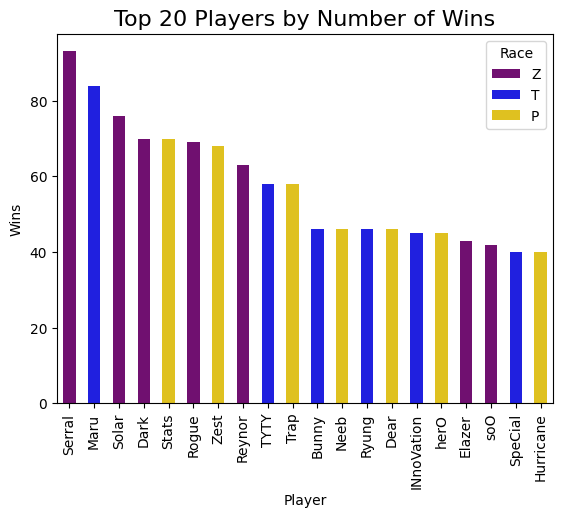

In [315]:
# We can plot this to more easily show.
sns.barplot(x = "Player" , y = "Wins", hue = "Race" , palette={"Z": "purple", "T": "blue", "P": "gold"} ,data = playerwinsrace.head(20), width =.5)

plt.title("Top 20 Players by Number of Wins", fontsize=16)
plt.xlabel("Player")
plt.ylabel("Wins")
plt.xticks(rotation=90)

plt.show()

In [316]:
# Best Player using each metric.
# The best way to do this will be find the player average for each metric
playerstat1 = iem[["Player1", "Race1", "APM1", "SPM1", "PSC1","SQ1"]].rename(columns={
    "Player1": "Player", "Race1": "Race", "APM1": "APM", "SPM1": "SPM", "PSC1": "PSC", "SQ1": "SQ"
})

playerstat2 = iem[["Player2", "Race2", "APM2", "SPM2", "PSC2","SQ2"]].rename(columns={
    "Player2": "Player", "Race2": "Race", "APM2": "APM", "SPM2": "SPM", "PSC2": "PSC", "SQ2": "SQ"
})

playerstat = pd.concat([playerstat1, playerstat2], ignore_index = True)
playerstat.head()

,Player,Race,APM,SPM,PSC,SQ
0,Polt,T,216,14.196245,5.128205,69
1,Polt,T,242,14.107624,6.862745,86
2,Polt,T,209,13.373235,7.339450,91
3,Polt,T,251,14.791656,8.196721,110
4,Polt,T,211,16.786930,4.929577,99


In [317]:
# Now we need to combine all player matches to an average.
avgstat = playerstat.groupby("Player").mean(numeric_only=True).reset_index()
avgstatrace = avgstat.merge(playermainrace, on="Player", how="left")
avgstatrace.head()

,Player,APM,SPM,PSC,SQ,Race
0,AcerBly,167.200000,31.919749,9.989671,82.200000,Z
1,ArT,198.105263,42.524117,4.916993,115.210526,P
2,Arctur,264.600000,23.431126,10.841655,109.700000,T
3,Armani,282.513514,51.172508,8.631800,123.810811,Z
4,Astrea,196.000000,32.815253,6.061466,117.140625,P


In [318]:
# Now its as simple as ordering by each metric
avgapm = avgstat.sort_values("APM", ascending = False)
avgapm.head()

,Player,APM,SPM,PSC,SQ
141,TLO,614.800000,26.597816,8.028095,130.850000
78,LiquidTLO,546.562500,30.638860,9.625788,114.937500
118,Reynor,414.126214,52.424241,7.180887,133.718447
27,DRG,400.565217,41.469725,8.529907,138.260870
113,RagnaroK,397.333333,49.010428,9.386699,140.712121


#### APM
For APM the German Zerg player **TLO** is our strongest. The Italian Zerg **Reynor** is the runner up. 


It is to be noted that the same player appears multiple times due to name changes throughout the years. I will subsequently choose to ignore the lowest average. 

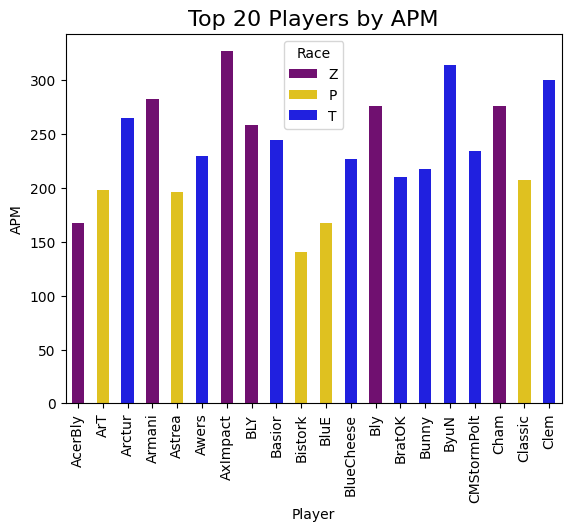

In [319]:
# To show the spread better I will do another bar chart simillar to before!
# Merge race for each player with avg stat df
avgapmrace = avgapm.merge(playermainrace, on="Player", how="left")

# Draw the plot

sns.barplot(x = "Player" , y = "APM", hue = "Race" , palette={"Z": "purple", "T": "blue", "P": "gold"} ,data = avgstatrace.head(20), width =.5)

plt.title("Top 20 Players by APM", fontsize=16)
plt.xlabel("Player")
plt.ylabel("APM")
plt.xticks(rotation=90)

plt.show()

This really highlights how Zergs tend to have higheer apms.

In [320]:
# This process can be compied almost completely for SPM PSC and SQ
#SPM
avgspm = avgstat.sort_values("SPM", ascending = False)
avgspm.head()

,Player,APM,SPM,PSC,SQ
139,Super,354.250000,89.816126,8.809723,103.000000
170,iGXiGua,270.500000,56.141892,6.566551,108.250000
71,Lambo,352.111111,53.656081,8.601689,129.066667
118,Reynor,414.126214,52.424241,7.180887,133.718447
3,Armani,282.513514,51.172508,8.631800,123.810811


#### SPM
Our top player for spm is **Super** The Korean Protoss player. The runner up is **XiGua** the Chinese Zerg

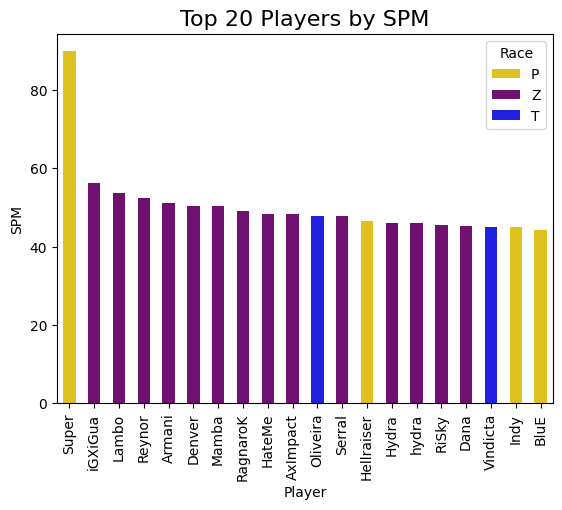

In [321]:
#Merging for race
avgspmrace = avgspm.merge(playermainrace, on="Player", how="left")

#Plot
sns.barplot(x = "Player" , y = "SPM", hue = "Race" , palette={"Z": "purple", "T": "blue", "P": "gold"} ,data = avgspmrace.head(20), width =.5)

plt.title("Top 20 Players by SPM", fontsize=16)
plt.xlabel("Player")
plt.ylabel("SPM")
plt.xticks(rotation=90)

plt.show()

This again supports that Zergs tend to be the faster players, with the exception of Super.

In [322]:
#Percentage Supply Cap
avgpsc = avgstat.sort_values("PSC", ascending = True)
avgpsc.head()

,Player,APM,SPM,PSC,SQ
59,IIIIIIIII,225.500000,28.057055,3.281250,113.500000
108,PiG,237.000000,25.583556,3.544334,81.500000
49,Harstem,234.600000,26.117909,4.525440,122.061538
115,Rail,324.187500,18.353390,4.656428,127.125000
47,HaPe,97.333333,16.383524,4.830538,87.000000


#### PSC

We have our top player. The Australian Zerg **PiG** with the Dutch Protoss player **Harstem** in runner up.


to be noted that our 'actual' top player is a barcode* so i will ommit that player.

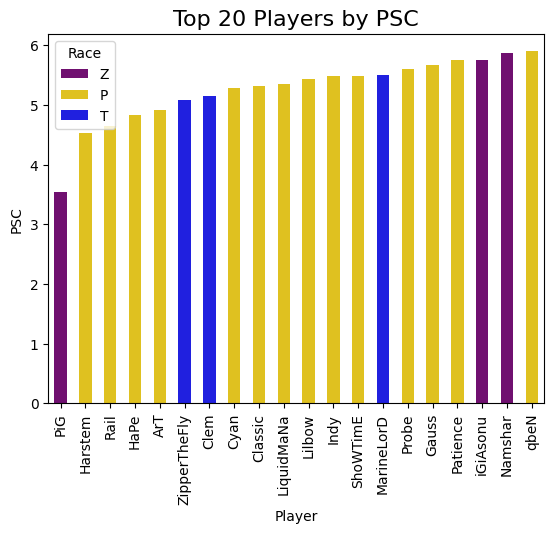

In [323]:
#drop the barcode
avgpsc = avgpsc.loc[avgpsc["Player"] != "IIIIIIIII"]

avgpscrace = avgpsc.merge(playermainrace, on="Player", how="left")

#Plot
sns.barplot(x = "Player" , y = "PSC", hue = "Race" , palette={"Z": "purple", "T": "blue", "P": "gold"} ,data = avgpscrace.head(20), width =.5)

plt.title("Top 20 Players by PSC", fontsize=16)
plt.xlabel("Player")
plt.ylabel("PSC")
plt.xticks(rotation=90)

plt.show()

Protoss players seem to be the most supply aware.

In [324]:
#Spending Quotient
avgsq = avgstat.sort_values("SQ", ascending = False)
avgsq.head()

,Player,APM,SPM,PSC,SQ
113,RagnaroK,397.333333,49.010428,9.386699,140.712121
19,Clem,299.968750,38.932500,5.160496,139.140625
27,DRG,400.565217,41.469725,8.529907,138.260870
153,Zanster,308.400000,30.719981,7.419773,137.920000
130,Solar,316.007519,43.205433,7.199089,136.654135


#### SQ
The winner is **RagnaroK** a Korean Zerg Player with the French Terran **Clem** runners up.

to be noted that this is much closer than the other statistics

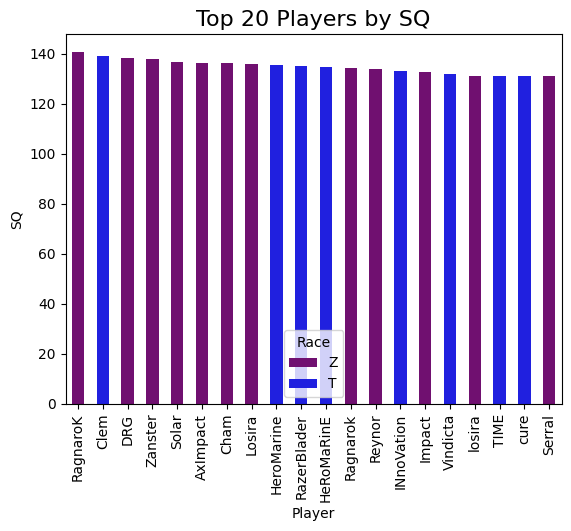

In [325]:
avgsqrace = avgsq.merge(playermainrace, on="Player", how="left")

#Plot
sns.barplot(x = "Player" , y = "SQ", hue = "Race" , palette={"Z": "purple", "T": "blue", "P": "gold"} ,data = avgsqrace.head(20), width =.5)

plt.title("Top 20 Players by SQ", fontsize=16)
plt.xlabel("Player")
plt.ylabel("SQ")
plt.xticks(rotation=90)

plt.show()

Protoss is nowhere to be seen on this graph. This could imply that toss players are bad at spending. but i am more inclined to believe that it is due to the mechanics of protoss. As having more expensive units mean you will always have to have to delay spending relative to terran and protoss. furthermore Warp ins promote a less constant spending of reasources.

In [326]:
# To do the best overall stats it would be best to normalise all the scores then combine them and order the players by the combined score

stats = ["APM", "SPM", "PSC", "SQ"]

normstat = avgstatrace.copy()

for col in stats:
    col_min = np.min(normstat[col])
    col_max = np.max(normstat[col])
    norm_col = (normstat[col] - col_min) / (col_max - col_min)
    
    if col == "PSC":
            norm_col = 1 - norm_col
    
    normstat[col] = norm_col

normstat.head()

,Player,APM,SPM,PSC,SQ,Race
0,AcerBly,0.174373,0.338026,0.540843,0.020096,Z
1,ArT,0.231380,0.459274,0.888042,0.572924,P
2,Arctur,0.354033,0.240969,0.482529,0.480639,T
3,Armani,0.387076,0.558158,0.633782,0.716953,Z
4,Astrea,0.227496,0.348265,0.809708,0.605248,P


In [327]:
#Now add a combined stat column and make it a percentage
normstat["Combined Score %"] = ((normstat["APM"] + normstat["SPM"] + normstat["PSC"] + normstat["SQ"]) / 4) * 100

normstat.head()

,Player,APM,SPM,PSC,SQ,Race,Combined Score %
0,AcerBly,0.174373,0.338026,0.540843,0.020096,Z,26.833448
1,ArT,0.231380,0.459274,0.888042,0.572924,P,53.790491
2,Arctur,0.354033,0.240969,0.482529,0.480639,T,38.954265
3,Armani,0.387076,0.558158,0.633782,0.716953,Z,57.399230
4,Astrea,0.227496,0.348265,0.809708,0.605248,P,49.767935


In [328]:
# Now to order by the score to get our overall best player (Mechanically)
normstat.sort_values("Combined Score %", ascending = False).head(15)

,Player,APM,SPM,PSC,SQ,Race,Combined Score %
118,Reynor,0.629844,0.572470,0.733090,0.882877,Z,70.457009
141,TLO,1.000000,0.277176,0.675103,0.834839,Z,69.677944
113,RagnaroK,0.598869,0.533437,0.582113,1.000000,Z,67.860465
19,Clem,0.419273,0.418208,0.871375,0.973682,T,67.063474
27,DRG,0.604830,0.447218,0.640756,0.958949,Z,66.293832
150,Vindicta,0.521046,0.488728,0.722324,0.849313,T,64.535280
130,Solar,0.448858,0.467064,0.731844,0.932041,Z,64.495164
71,Lambo,0.515453,0.586554,0.635843,0.804973,Z,63.570598
139,Super,0.519399,1.000000,0.621604,0.368434,P,62.735927
125,Serral,0.410631,0.518771,0.728292,0.834857,Z,62.313778


#### Best Overall
Our best overall is the Italian Zerg **Reynor**, the runner up for SPM stats. In the top 15 their are some familar names. All 5 of the best for the other metrics are at the top. This give the statistic a bit of merit as it means it is not completely off.

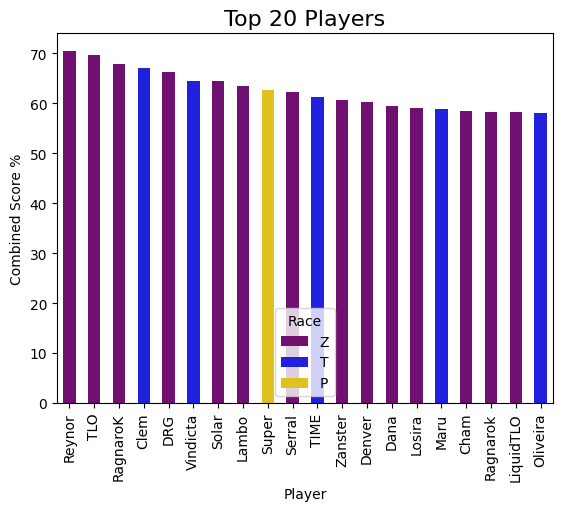

In [329]:
#lets visualise this.
#Plot
sns.barplot(x = "Player" , y = "Combined Score %", hue = "Race" , palette={"Z": "purple", "T": "blue", "P": "gold"} ,data = normstat.sort_values("Combined Score %", ascending = False).head(20), width =.5)

plt.title("Top 20 Players", fontsize=16)
plt.xlabel("Player")
plt.ylabel("Combined Score %")
plt.xticks(rotation=90)

plt.show()